# Generalized Fokker Planck master equation

In [1]:
import numpy as np
import time as tm 
import pylab as plt

from scipy import integrate
from scipy import sparse
plt.rcParams.update({'font.size': 20})
#plt.rcParams.update({'font.size': 30})
from mpmath import mp

### Pre-definitions and parameters

In [2]:
################## Parameters value

dx = 1.0                     # spatial separation
x = np.arange(-80,80, dx)    # spatial grid points

m     = 1.0                  # mass
omega = 0.5                  # HO frequency
gamma = 10.0                 # dissip    
KbT   = gamma                 
Dif   = 2 * KbT/gamma        # D= nu/gamma^2 = 2KbT/gamma diffusion const
sigma = 0.4 * gamma          # range/gamma^2

varsigma = sigma/gamma

################## Coefficients

beta0 = 1
beta1 = (1/2) * varsigma**2
beta2 = (1/8) * varsigma**4
beta3 = (1/48) * varsigma**6
beta4 = (1/384) * varsigma**8

zeta0 = 1/2 
zeta1 = (1/8) * varsigma**2
zeta2 = (1/48) * varsigma**4
zeta3 = (1/384) * varsigma**6
zeta4 = (1/3840) * varsigma**8

C0 = (gamma*varsigma**2/Dif) * beta0 + zeta0
C1 = (gamma*varsigma**2/Dif) * beta1 + zeta1
C2 = (gamma*varsigma**2/Dif) * beta2 + zeta2
C3 = (gamma*varsigma**2/Dif) * beta3 + zeta3
C4 = (gamma*varsigma**2/Dif) * beta4 + zeta4

################## Definition of analytical function for the BM

kappa = gamma * Dif/omega**2

Z = 1./(np.sqrt(2*np.pi*kappa * np.abs(- zeta0)))
brow_an = Z * (np.exp(- x**2/(kappa)))

### Master equation for the standard and for the generalized BMs (SBM and gBM, repectively) and initial $\rho_0(x)$ 

1.0


<Figure size 432x288 with 0 Axes>

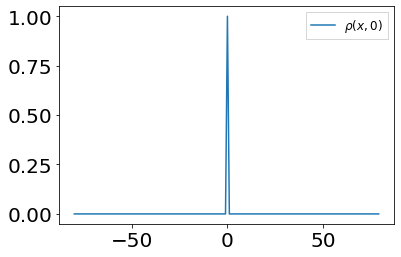

<Figure size 432x288 with 0 Axes>

In [3]:
################## Initial rho0   

def ddf(x,sig):
    x0 = x #- 10
    val = np.zeros_like(x0)
    val[(-(1/(10*sig))<=x0) & (x0<=(1/(10*sig)))] = 1
    return val

delta0 = ddf(x,1)            # initial delta
print(np.trapz(delta0, x))   #normalization-check


################## overdamped standard BM rho_t   

def sBM_rho_t(t, rho):
    B0 = omega**2/gamma * np.convolve(x*rho, [1,-1], 'same') / dx  
    B2 = 1/2 * np.convolve(rho, [1,-2,1], 'same') / (dx**2)
    #print(t)
    return  B0 + Dif* B2 


################## overdamped GenBM rho_t   

def gBM_rho_t(t, rho):
    D0 = omega**2/gamma * np.convolve(x*rho, [1,-1], 'same') / dx  
    D2 = C0 * np.convolve(rho, [1,-2,1], 'same') / (dx**2)
    D4 = C1 * np.convolve(rho, [1, -4, 6, -4, 1], 'same') / (dx**4)
    D6 = C2 * np.convolve(rho, [1, -6, 15, -20, 15,  -6, 1], 'same') / (dx**6)
    D8 = C3 * np.convolve(rho, [1, -8, 28, -56, 70, -56, 28, -8, 1], 'same') / (dx**8)
    D10= C4 * np.convolve(rho, [1, -10, 45, -120, 210, -252, 210, -120, 45, -10, 1], 'same') / (dx**10)
    return  D0 + Dif*(D2 + D4 + D6 + D8 + D10)

################## Harmonic Force and Potential    

V = 0.5 * omega**2 * (x)**2     # harmonic potential
#F = - omega**2 * (x)           # harmonic force

################## Plot of rho0 and V

#plt.plot(x, V, "k--", label=r"$V(x)$")           # plot potential
plt.plot(x, delta0, label=r"$\rho(x,0)$")         # plot rho0

#plt.xlim(-10, 10)
plt.legend(loc=1, fontsize=12, fancybox=False)
plt.figure()

### Master equation solutions 

In [4]:
################## Time initial conditions

dt = 0.1                       # time interval for snapshots
t0 = 0.0                        # initial time
tf = 100.0                       # final time
t_eval = np.arange(t0, tf, dt)  # time range

for i in t_eval:
    t_dur = int(i/dt)
    
#print(t_dur)

start = tm.time()

#########################################################

################## Solve the Initial Value Problem

# overdamped standard BM
sBM_sol = integrate.solve_ivp(sBM_rho_t, t_span=[t0, tf], y0=delta0, t_eval=t_eval,  method="RK23")

# overdamped generalized BM
gBM_sol = integrate.solve_ivp(gBM_rho_t, t_span=[t0, tf], y0=delta0, t_eval=t_eval,  method="RK23")

print(sBM_sol.message)
print(gBM_sol.message)

##########omega = 0.5###############################################

end = tm.time()
print("")
print(end-start)

The solver successfully reached the end of the integration interval.
The solver successfully reached the end of the integration interval.

0.23119449615478516


### Plot of the numerical and analytical results of sBM steady-state 

* $\rho^{sBM_{an}}_{ss}(x) $ 
* $\rho^{sBM_{num}}_{ss}(x) $ 

<Figure size 432x288 with 0 Axes>

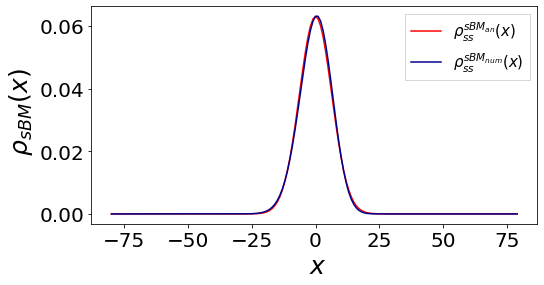

<Figure size 432x288 with 0 Axes>

In [5]:
fig1 = plt.figure(figsize=(8, 4))

plt.plot(x, brow_an , color='red', label=r"$\rho_{ss}^{sBM_{an}}(x)$")
plt.plot(x, sBM_sol.y[:,t_dur], color= 'darkblue', label=r"$\rho_{ss}^{sBM_{num}}(x)$")

plt.xlabel(r' $x$', fontsize = 25)
plt.ylabel(r' $\rho_{sBM}(x)$', fontsize = 25)

plt.legend(loc=1, fontsize=15, fancybox=False)
#fig1.savefig('/home/fariaart/Downloads/compar.png', transparent=False)

plt.figure()

### Plot of the numerical result of gBM steady-state $\rho^{gBM_{num}}_{ss}(x)$ alongside with $\rho^{sBM_{num}}_{ss}(x) $

<Figure size 432x288 with 0 Axes>

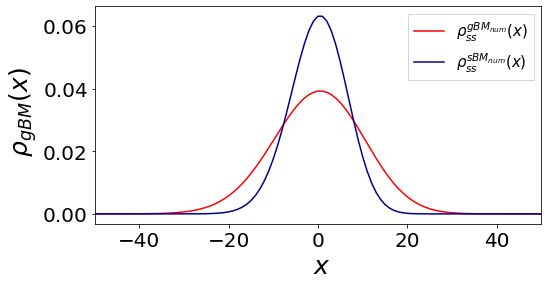

<Figure size 432x288 with 0 Axes>

In [6]:
################## Plot of gBM_num and gBM_an

fig2 = plt.figure(figsize=(8, 4))

plt.plot(x, gBM_sol.y[:,t_dur], color='red', label=r"$\rho_{ss}^{gBM_{num}}(x)$")
plt.plot(x, sBM_sol.y[:,t_dur], color= 'darkblue', label=r"$\rho_{ss}^{sBM_{num}}(x)$")

#plt.ylim(0,0.08)
plt.xlim(-50, 50)
plt.xlabel(r' $x$', fontsize = 25)
plt.ylabel(r' $\rho_{gBM}(x)$', fontsize = 25)

plt.legend(loc=1, fontsize=15, fancybox=False)
#fig2.savefig('/home/fariaart/Downloads/compar.png', transparent=False)

plt.figure()